# DATA COLLECTION & DATA PREPROCESSING

# LOADING DATASET

In [1]:
# IMPORTING LIBRARIES

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [2]:
# DEFINING THE CONSTANT

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [3]:
#IMPORTING THE DATASET

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PLANT VILLAGE",   
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
       )

Found 2152 files belonging to 3 classes.


In [4]:
#CHECKING ALL THE CLASS NAMES PRESENT IN THE DATASET

class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
#CHECKING THE LENGTH

len(dataset)

68

ITS SHOWING 68 BCZ.. THE BATCH SIZE IS AROUND 32 AND THE MULTIPLIACTION BETWEEN 32 * 68 IS 2176...IT SHOWING BIT MORE FROM THE FILES FOUND BCZ LAST BATCH IS NOT PROPERLY SETTELED 

In [6]:
#NUMBER OF SIZE OF BATCHES IN IMAGE BATCH AND IN LABEL BATCH

for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 1 1 0 1 0 2 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 2 1 1 1 0]


# DATA VISUALISATION

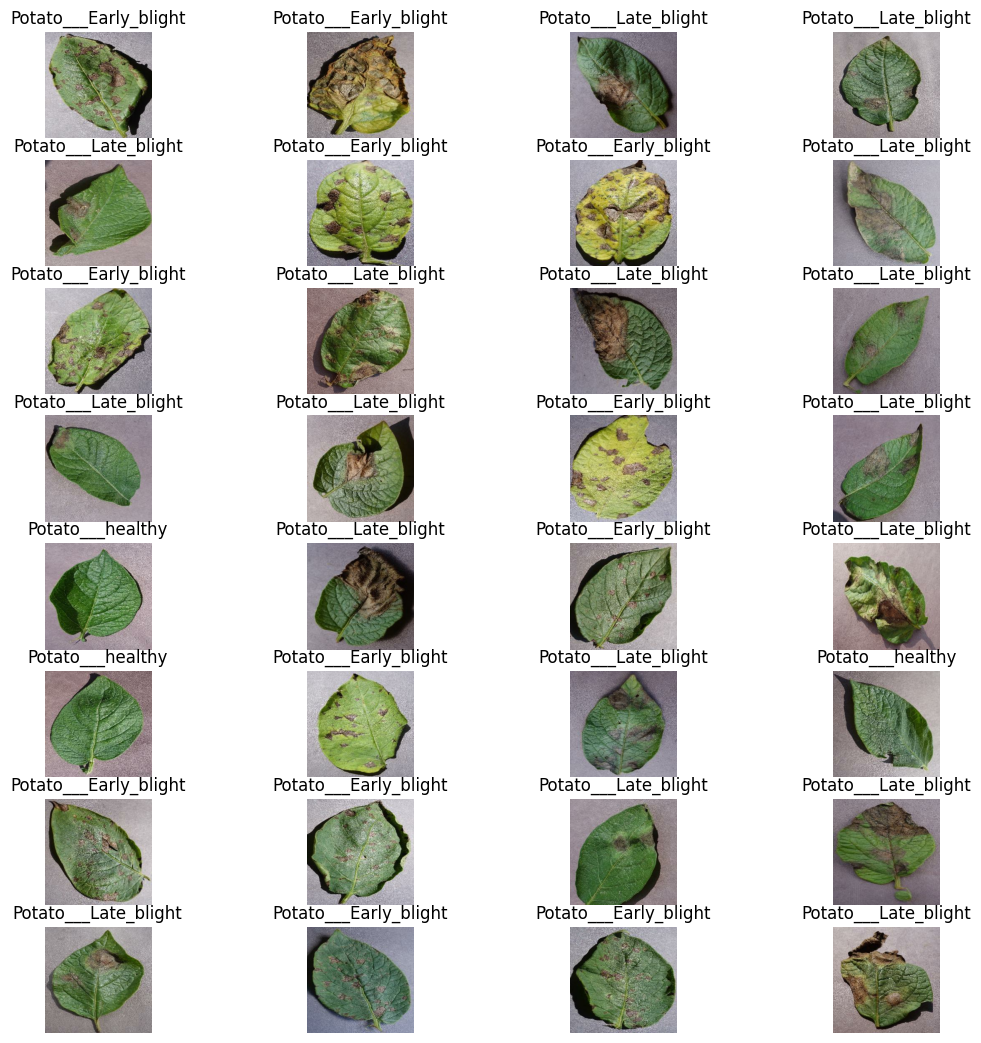

In [7]:
#CONVERING THE FLOAT TYPE INTO INTEGER TYPE FOR CLEAR VISUALISATION
#GETTING ALL THE CLASS NAMES WITH THE REAL IMAGE FIGURE


plt.figure(figsize=(13,13))

for image_batch, label_batch in dataset.take(1):
    for i in range(32):
        ax = plt.subplot(8,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

ALL THE IMAGES IN THE SINGLE BATCH ARE SHOWING ABOVE...WITH THE SHUFFLE IS ON...SO THE BATCHES ARE SHUFFLING UP

# TRAIN TEST AND VALIDATION SPLIT

In [8]:
# TRAIN TEST SPLIT

def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, test_ds, val_ds

In [9]:
#PUTTING UP ALL THE VALUES ON THE DATASET

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [10]:
#GETTING ALL THE LENGTH OF THE TRAIN , TEST AND VALIDATION SPLIT

print("LENGTH OF THE TRAINING DATASET :",len(train_ds))
print("LENGTH OF THE TEST DATASET :",len(test_ds))
print("LENGTH OF THE VALIDATION DATASET :",len(val_ds))

LENGTH OF THE TRAINING DATASET : 54
LENGTH OF THE TEST DATASET : 6
LENGTH OF THE VALIDATION DATASET : 8


In [11]:
#PREFECTHING THE DATASET OF ALL TRAIN, TEST AND VALIADATION DATASET

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
#CREATING A SEQUENTIAL LAYER FOR RESIZING AND RESCALING

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
#CREATING A SEQUENTIAL LAYER FOR DATA AUGMENTATION


data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

LAYERS ARE IN CREATION FOR THE DEEP LEARNING MODEL

# MODEL BUILDING

In [15]:
#BUILDING AND TRAINING THE CNN MODEL
#IN THE FIRST PHASE..THE CONVOLUTIONAL LAYER WITH POOLING LAYER
#THERE ARE 6 NUMBERS OF CONVOLUTIONAL LAYER AFTER TRIALS AS IT CAN EFFECT ON THE ACCURACY OF THE MODEL
#STEPS ARE : CONVOLUTIONAL LAYER --> POOLING LAYER --> FLATTENING LAYER --> OUTPUT LAYER OR DENSE LAYER
#PHASES ARE : ---------------1ST  PHASE------------- : ----2ND PHASE----- : --------LAST PHASE--------- 


input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    #THE FIRST PHASE - MAKING THE CONVOLUTIONAL LAYER WITH POOLING LAYER WITH APPROPRIATE NUMBER OF THEMS ACCORDNING TO THE ACCURACY
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #SECOND PHASE
    layers.Flatten(), # FLATTENING THE LAYER
    #LAST PHASE
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax"),
])

model.build(input_shape = input_shape)

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

# COMPILING THE MODEL

WHY DO WE COMPILE THE DEEP LEARNING MODELS ?

It checks for format errors, and defines the loss function, the optimizer or learning rate, and the metrics. A compiled model is needed for training but not necessary for predicting.


In [ ]:
# NOW COMPILING THE MODEL
# COMPILING THE MODEL CONSISTS - OPTIMIZERS, LOSS FUNCTION, METRCIS

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics = ['accuracy']

) 

# TRAINING THE MODEL

In [ ]:
# TRAINING THE MODEL

history = model.fit(
    train_ds,
    epochs = EPOCH,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 92s 2s/step - loss: 0.9101 - accuracy: 0.4728 - val_loss: 0.7706 - val_accuracy: 0.5039
Epoch 2/50
54/54 [==============================] - 76s 1s/step - loss: 0.8122 - accuracy: 0.5573 - val_loss: 0.6822 - val_accuracy: 0.6523
Epoch 3/50
54/54 [==============================] - 75s 1s/step - loss: 0.6105 - accuracy: 0.7037 - val_loss: 0.4729 - val_accuracy: 0.8320
Epoch 4/50
54/54 [==============================] - 75s 1s/step - loss: 0.4244 - accuracy: 0.8258 - val_loss: 0.3814 - val_accuracy: 0.8398
Epoch 5/50
54/54 [==============================] - 76s 1s/step - loss: 0.2899 - accuracy: 0.8767 - val_loss: 0.2663 - val_accuracy: 0.8789
Epoch 6/50
54/54 [==============================] - 81s 2s/step - loss: 0.2498 - accuracy: 0.9057 - val_loss: 0.1170 - val_accuracy: 0.9492
Epoch 7/50
54/54 [==============================] - 80s 1s/step - loss: 0.2158 - accuracy: 0.9132 - val_loss: 0.1745 - val_accuracy: 0.9453
Epoch 8/50
54/54 [==